# train many supervised models to select
29 features with balanced class ClinVar data

# train models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#df_3=pd.read_csv('/Users/nancy/Desktop/RS_projects/data/03_ML/01_train_model/01_featureV1/zelse/01_preprocessed_data_M0.csv')
df_3=pd.read_csv('../../../../../data/03_ML/01_train_model/01_featureV1/zelse/01_preprocessed_data_M0.csv')

## split test/train

In [3]:
## balance benign and pathogenic quantity

benign = df_3[df_3["CLNSIG"]==0]
pathogenic = df_3[df_3["CLNSIG"]==1]
benign = benign.sample(len(pathogenic),random_state=42)   # randomly extract benign same quantity with patho
data = pd.concat( (benign,pathogenic),axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True)

In [4]:
data.columns[1:]

Index(['Consequence', 'IMPACT', 'BIOTYPE', 'SIFT', 'PolyPhen', 'SPIDEX_NAN',
       'SIFT_NAN', 'PolyPhen_NAN', 'REVEL_score_NAN',
       'SpliceAI_pred_DS_AG_NAN', 'ORIGIN_0', 'ORIGIN_1', 'ORIGIN_2',
       'ORIGIN_3', 'ORIGIN_4', 'ORIGIN_5', 'CADD', 'AF_TGP', 'Frq',
       'GNOMADAF_popmax', 'Hom', 'SPIDEX', 'SWEGENAF', 'MES-SWA_acceptor_alt',
       'MES-SWA_acceptor_diff', 'MES-SWA_donor_alt', 'MES-SWA_donor_diff',
       'MaxEntScan_alt', 'MaxEntScan_diff', 'GERP++_RS', 'REVEL_score',
       'phastCons100way_vertebrate', 'phyloP100way_vertebrate', 'LoFtool',
       'pLI_gene_value', 'SpliceAI_pred_DS_AG', 'SpliceAI_pred_DS_AL',
       'SpliceAI_pred_DS_DG', 'SpliceAI_pred_DS_DL'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                    test_size=0.3,
                    random_state=42,
                    stratify=y)

/Users/nancy/miniconda3/envs/bioinfo/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
X_train.shape

(251010, 39)

##  train models

In [7]:
import mglearn   # lizard book's library for plots    # pip install mglearn

In [8]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#### 1. k-Nearest Neighbors
classifier   k-NN
slower, 16mins ! bad for much 0, much features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(X_train, y_train)
# predictions = clf.predict(X_test)
# record training set accuracy
print("Training set score: {:.4f}".format(clf.score(X_train, y_train))) 
print("Test set score: {:.4f}".format(clf.score(X_test, y_test)))

In [11]:
## saved model, now load
import joblib

clf = joblib.load('../../../../../result/03_ML/01_train_model/01_featureV1/zelse/models/KNN_featsV1_model.sav')

# test = joblib.load('KNN_featsV1_model.sav')    # load back
# test.score(X_test, y_test)

for ROC curve

In [12]:
prob1 = clf.predict_proba(X_test)
prob1 = prob1[:,1]     # choose the 2nd column --class 1 pathogenic
fprKn, tprKn, thresholdsKn = roc_curve(y_test, prob1)

#### 2. linear regression 
Ridge regression alternatives to standard 

In [15]:
# # linear regression   no parameter can adjust
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.5f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.5f}".format(lr.score(X_test, y_test)))

# save model
#joblib.dump(lr,'/Users/nancy/Desktop/RS_projects/result/03_ML/01_train_model/01_featureV1/zelse/models/LinerR_featsV1_model.sav')

Training set score: 0.86282
Test set score: 0.86495


['/Users/nancy/Desktop/RS_projects/result/03_ML/01_train_model/01_featureV1/zelse/models/LinerR_featsV1_model.sav']

In [16]:
## 'LinearRegression' object has no attribute 'predict_proba'

# ## for ROC
# prob2 = lr.predict_proba(X_test)
# prob2 = prob2[:,1]     # choose the 2nd column --class 1 pathogenic
# fprLr, tprLr, thresholdsLr = roc_curve(y_test, prob2)

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

#### 3. logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)   # max iteration to finish converage: max_iter=1000 , C =1 
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.978
Test set score: 0.978


In [13]:
## saved model, now load 

logreg = joblib.load('../../../../../result/03_ML/01_train_model/01_featureV1/zelse/models/logistic_featsV1_model.sav')

# test = joblib.load('KNN_featsV1_model.sav')    # load back
# test.score(X_test, y_test)

In [14]:
## for ROC
prob3 = logreg.predict_proba(X_test)
prob3 = prob3[:,1]     # choose the 2nd column --class 1 pathogenic
fprLg, tprLg, thresholdsLg = roc_curve(y_test, prob3)

#### 4. Linear SVM
more than 1min

In [ ]:
# from sklearn.svm import LinearSVC
# linear_svm = LinearSVC(max_iter=1000).fit(X_train, y_train)
# print("Training set score: {:.3f}".format(linear_svm.score(X_train, y_train))) 
# print("Test set score: {:.3f}".format(linear_svm.score(X_test, y_test)))

#### 5.decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.979


In [16]:
## saved model, now load

tree = joblib.load('../../../../../result/03_ML/01_train_model/01_featureV1/zelse/models/decision_featsV1_model.sav')

In [17]:
## for ROC
prob4 = tree.predict_proba(X_test)
prob4 = prob4[:,1]
fprDt, tprDt, thresholdsDt = roc_curve(y_test, prob4)

#### 6. random forest
also for select feature importance
3mins

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=600,random_state=1) 
forest.fit(X_train, y_train)
print("Accuracy on training set: {:f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000000
Accuracy on test set: 0.987367


In [26]:
# load saved model
forest = joblib.load('../../../../../result/03_ML/01_train_model/01_featureV1/zelse/models/forest_featsV1_model.sav')

In [27]:
## for ROC curve
prob6 = forest.predict_proba(X_test)
prob6 = prob6[:,1]
fprRf, tprRf, thresholdsRf = roc_curve(y_test, prob6)

7. Gradient boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=500,random_state=0).fit(X_train, y_train)

print("Accuracy on training set: {:f}".format(GB.score(X_train, y_train))) 
print("Accuracy on test set: {:f}".format(GB.score(X_test, y_test)))

Accuracy on training set: 0.988945
Accuracy on test set: 0.986586


In [20]:
# load saved model
GB = joblib.load('../../../../../result/03_ML/01_train_model/01_featureV1/zelse/models/Gradient_featsV1_model.sav')

In [21]:
## for ROC curve
prob7 = GB.predict_proba(X_test)
prob7 = prob7[:,1]
fprGB, tprGB, thresholdsGB = roc_curve(y_test, prob7)

8. kernal SVM  
long time!

In [25]:
from sklearn.svm import SVC

svm = SVC(probability=True).fit(X_train, y_train)

print("Accuracy on training set: {:f}".format(svm.score(X_train, y_train))) 
print("Accuracy on test set: {:f}".format(svm.score(X_test, y_test)))

# save model
joblib.dump(svm,'/Users/nancy/Desktop/RS_projects/result/03_ML/01_train_model/01_featureV1/zelse/models/kerSVM_featsV1_model.sav')

Accuracy on training set: 0.977630
Accuracy on test set: 0.977783


['/Users/nancy/Desktop/RS_projects/result/03_ML/01_train_model/01_featureV1/zelse/models/kerSVM_featsV1_model.sav']

In [22]:
# load saved model
svm = joblib.load('../../../../../result/03_ML/01_train_model/01_featureV1/zelse/models/kerSVM_featsV1_model.sav')

In [23]:
## for ROC curve
prob8 = svm.predict_proba(X_test)
prob8 = prob8[:,1]
fprSVM, tprSVM, thresholdsSVM = roc_curve(y_test, prob8)

## plot ROC curve together, 6 models
KNN, logitic regression, decision tree, radom forest, Gradient boosting, kernal SVM
(linear SVM , linear regression doesn't have proba)

In [24]:
import sklearn.metrics as metrics

roc_Kn = metrics.auc(fprKn,tprKn)
# roc_Lr = metrics.auc(fprLr, tprLr)

roc_Lg = metrics.auc(fprLg,tprLg)
roc_Dt = metrics.auc(fprDt,tprDt)
roc_Rf = metrics.auc(fprRf,tprRf)

roc_Gb = metrics.auc(fprGB, tprGB)
roc_Svm = metrics.auc(fprSVM, tprSVM)


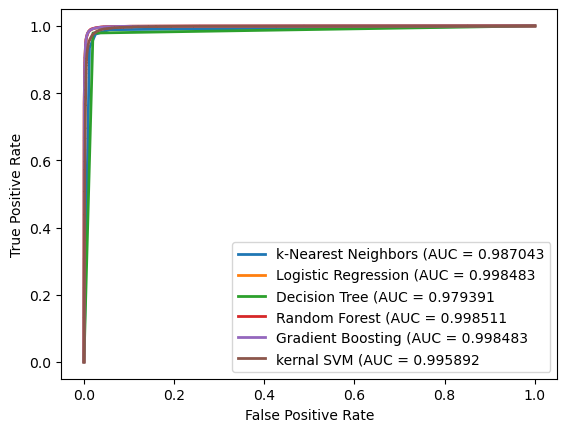

In [28]:
plt.plot(fprKn, tprKn, label='k-Nearest Neighbors'+ ' (AUC = ' + str("%.6f" % roc_Kn),linewidth=2)
# plt.plot(fprLr, tprLr, label='Linear Regression'+ ' (AUC = ' + str("%.6f" % roc_Lg),linewidth=2)

plt.plot(fprLg, tprLg, label='Logistic Regression'+ ' (AUC = ' + str("%.6f" % roc_Lg),linewidth=2)
plt.plot(fprDt, tprDt, label='Decision Tree' + ' (AUC = ' + str("%.6f" % roc_Dt), linewidth=2)
plt.plot(fprRf, tprRf, label='Random Forest' + ' (AUC = ' + str("%.6f" % roc_Rf), linewidth=2)

plt.plot(fprGB, tprGB, label='Gradient Boosting' + ' (AUC = ' + str("%.6f" % roc_Gb), linewidth=2)
plt.plot(fprSVM, tprSVM, label='kernal SVM' + ' (AUC = ' + str("%.6f" % roc_Svm), linewidth=2)


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()

# show the plot
plt.show()